![](https://miro.medium.com/max/4800/1*sMTSm5JLTD9fD2HO1vdCeQ.jpeg)
[Image Source](https://towardsdatascience.com/wrangling-through-dataland-modeling-house-prices-in-ames-iowa-75b9b4086c96): *Cracking the Ames Housing Dataset with Linear Regression*  by Alvin T. Tan.

# <center> Predicting Housing Prices in Ames, Iowa, using Multiple Linear Regression

### Table of Contents:
- [Background](#Background:)
- [Problem Statement](#Problem-Statement:)
- [Data Sources](#Data-Sources:)
- [Methodology](#Methodology:)
- [Data Cleaning and Exploratory Data Analysis](#Data-Cleaning-and-Exploratory-Data-Analysis:)
- [Preprocessing and Modeling](#Pre-processing-and-Modeling:)
- [Model Evaluation](#Model-Evaluation:)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations:)

# Background:

Commercial real estate search companies such as [Zillow](https://www.zillow.com/) and [RedFin](https://www.redfin.com/) provide customers the ability to find the housing options that match their needs. For instance, Zillow allows its subscribers to find key information on several properties in a geographic area including `final sales price`, `square footage`, `number of bedrooms`, `number of bathrooms`, and `the property's address`. Zillow uses individual home features to calculate its proprietary [Zestimate](https://www.zillow.com/z/zestimate/) or its estimate of a house's market value.

# Problem Statement:


An emerging competitor to Zillow and RedFin in the real estate search engine industry would like to identify differentiating factors from these large competitors and has contracted data analytics services to:

* Identify home features that are relevant in predicting home sale prices that Zillow and RedFin do not currently display.
* Create a linear regression model that will predict home sale prices based on observable features for houses not yet listed in these websites.

This competitor expects to access home features data that is not yet available to the competition. These objectives will help this company make the choice of whether to invest in modifying its current home search profiles with additional features and whether it should invest in purchasing the additional data to offer more search options to its current and future subscribers. The results of this analysis will be presented to the Chief Executive and Chief Information Officers.

A typical Zillow profile such as the one below includes features such as:
* Sale Price
* Number of bedrooms
* Number of bathrooms
* Total square footage
* Date of sale
* Zestimate
* Estimated refinance payment
* Home type
* Year built
* Type of cooling system
* Number of parking spaces
* Lot size in square feet
* Type of heating system
* Basement area
* Type of basement (i.e., partially finished, rear entrance)
* Flooring type
* Appliances available
* Total interior livable area
* Finished area above and below ground
* Total number of fireplaces
* Number of levels
* Fence type
* Architectural style
* Construction materials
* Property condition
* Whether the property is a new construction
* Utilities/ Green energy information
* Price history
* The same features for neighboring houses

<div>
<img src="https://wp-tid.zillowstatic.com/8/real-estate-facebook-ad-example-carousel-dd4184-941x1024.png" alt="drawing" style="width:600px;"/>

# Data Sources:

Using data from the city of Ames', Iowa, Assessor's Office for individual residential properties sold between 2006 to 2010, additional features that have an important relationship to sales price and that are not yet listed in Zillow profiles will be investigated. These data will also be used to build a machine learning model to predict sales price based on observable features. The dataset consists of 2,929 observations with 82 home features. The data set includes 23 nominal features, 23 ordinal features, 14 discrete features, and 20 continuous features and two identifying variables. A data dictionary can be found in [this](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) document.

# Methodology:

To analyze the data and achieve the project goals, the following steps will be used:

### Identifying features that the company should consider for displaying on its home profiles:
1. Ingest and clean the data set.
2. Explore the relationship of all features in the data set to the target feature, or sale price.
3. Use a multiple linear regression model and data visualization to determine which features `MyHomeSearch` should consider for presentation on its website.
4. Narrow down a list of features for inclusion in a machine learning model to predict sale price.

### Developing a machine learning model to predict sale price:
1. Run a linear regression model on a train, test split of the train data set.
2. Evaluate the performance of the model using metrics such as r-squared and mean squared error. 
3. Evaluate the performance against the null model.
4. Implement Ridge and Lasso regularization applying grid search to find the optimal hyperparameters that will produce the best model performance on the testing data set.
4. Generate predictions from the optimal model selected.

# Data Cleaning and Exploratory Data Analysis

## Data Cleaning

#### Import required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import sklearn.metrics as metrics

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [2]:
train = pd.read_csv('https://real-estate-data-ames-iowa.s3.amazonaws.com/train.csv')
test = pd.read_csv('https://real-estate-data-ames-iowa.s3.amazonaws.com/test.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


#### Check the dimensions of the test and train data sets.

In [4]:
train.shape, test.shape

((2051, 81), (878, 80))

30% (878/2929) of the data set is reserved for the test set.

Clean up column names by converting them to lower and snake case.

In [5]:
train.columns = train.columns.str.lower()
train.columns = [column.replace(" ", "_") for column in train.columns]

In [6]:
test.columns = test.columns.str.lower()
test.columns = [column.replace(" ", "_") for column in test.columns]

### Check for missing values.

In [7]:
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
garage_cars          1
garage_area          1
bsmtfin_sf_1         1
dtype: int64

Features with a high percentage of observations missing such as `pool_qc`, `misc_feature`, and `alley` can be dropped from the data set as they do not add a significant amount of information to the model. At least 80% (1,651/2051) of these observations are missing from the train data set.

In [8]:
train = train.drop(columns=['pool_qc','misc_feature','alley','fence'])
test = test.drop(columns=['pool_qc','misc_feature','alley','fence'])

Examine the patterns of missingness in the data.

Most observations have one or no missing values at all. The minority of observations in the train data set have missing values in between 2 to 12 features. Therefore, none of the observations will be dropped based on the number of missing values.

In [9]:
train.isnull().sum(axis=1).value_counts().sort_values(ascending=False)

1     950
0     812
6     123
2     116
5      14
3      13
7      12
11      7
12      2
10      1
8       1
dtype: int64

Some of the nominal and ordinal features in the data set can be represented as binary variables and avoid having missing values in these features.

In [10]:
def feature_clean_up(data,features,feature_type):
    if feature_type == 'ordinal':
        for feature in features:
            data[feature] = data[feature].apply(lambda x: 1 if x in ['Ex','Gd','TA'] else 0)
    elif feature_type == 'nominal':
        for feature in features:
            data[feature] = data[feature].apply(lambda x: 1 if x != None else 0)
    return data

In [11]:
train = feature_clean_up(train,['exter_qual','exter_cond','bsmt_qual','bsmt_cond','heating_qc',
                        'kitchen_qual','fireplace_qu','garage_qual','garage_cond'], 'ordinal')

test = feature_clean_up(test,['exter_qual','exter_cond','bsmt_qual','bsmt_cond','heating_qc',
                        'kitchen_qual','fireplace_qu','garage_qual','garage_cond'], 'ordinal')

Drop object-type features with 70% or more observations pertain to one class only.

In [12]:
obj_features = [feature for feature in train.columns if train[feature].dtypes == 'O']

In [13]:
for feature in obj_features:
    if train[feature].value_counts(normalize=True).sort_values(ascending=False)[0] > .7:
        train.drop(columns=[feature],inplace=True)
        test.drop(columns=[feature],inplace=True)

For the remaining object-type features, correlate these features with the sales price and represent them as binary variables based on the values that correspond to a higher average sales price.

In [14]:
def visualize_feature_with_price(feature,order,xticks,title,xlabel):
    plt.figure(figsize=(10,5))
    plot = sns.barplot(x=train[feature],y=train['saleprice'], order=order, ci=None)
    plot.set_xticklabels(xticks)
    plt.title(title, size=14)
    plt.xlabel(xlabel,size=14)
    plt.ylabel('Sales Price',size=14);
    return

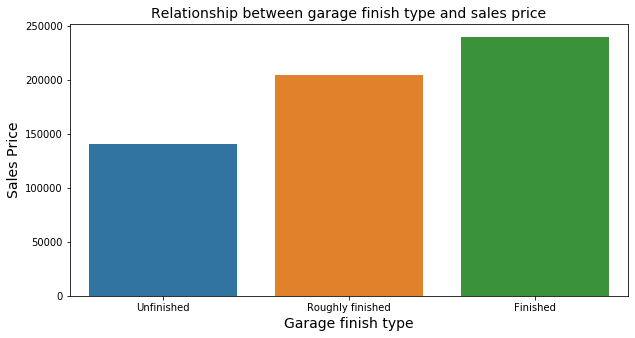

In [15]:
visualize_feature_with_price('garage_finish',['Unf','RFn','Fin'],['Unfinished','Roughly finished','Finished'],
                            'Relationship between garage finish type and sales price',
                            'Garage finish type')

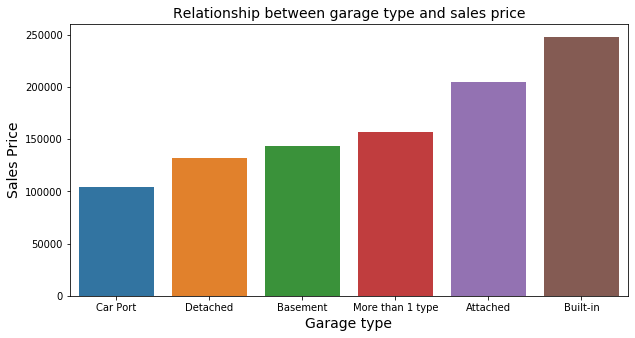

In [16]:
visualize_feature_with_price('garage_type',['CarPort','Detchd','Basment','2Types','Attchd','BuiltIn'],
                             ['Car Port','Detached','Basement','More than 1 type', 'Attached','Built-in'],
                            'Relationship between garage type and sales price',
                            'Garage type')

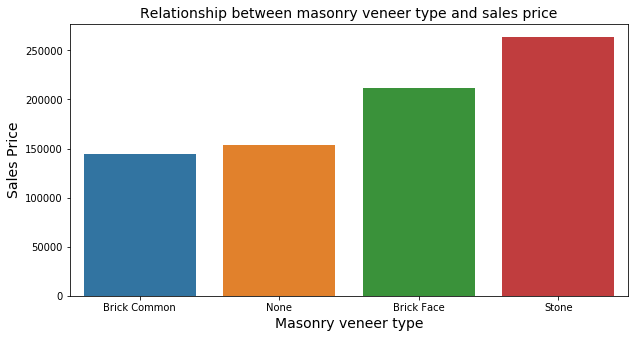

In [17]:
visualize_feature_with_price('mas_vnr_type',['BrkCmn','None','BrkFace','Stone'],
                             ['Brick Common','None','Brick Face','Stone'],
                            'Relationship between masonry veneer type and sales price',
                            'Masonry veneer type')

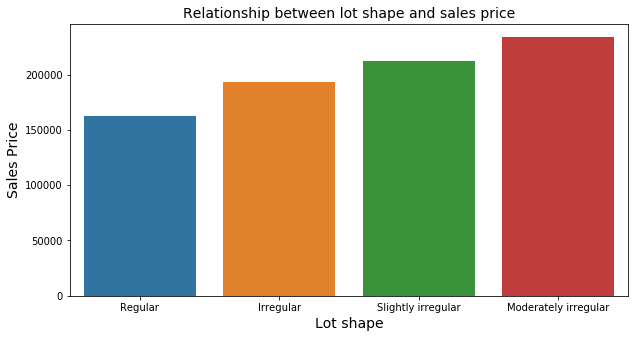

In [18]:
visualize_feature_with_price('lot_shape',['Reg','IR3','IR1','IR2'],
                             ['Regular','Irregular','Slightly irregular','Moderately irregular'],
                            'Relationship between lot shape and sales price',
                            'Lot shape')

In [19]:
train['garage_finish'] = train['garage_finish'].apply(lambda x: 1 if x in ['RFn','Fin'] else 0)
test['garage_finish'] = test['garage_finish'].apply(lambda x: 1 if x in ['RFn','Fin'] else 0)

In [20]:
train['garage_type'] = train['garage_type'].apply(lambda x: 1 if x in ['Attchd','BuiltIn'] else 0)
test['garage_type'] = test['garage_type'].apply(lambda x: 1 if x in ['Attchd','BuiltIn'] else 0)

In [21]:
train['mas_vnr_type'] = train['mas_vnr_type'].apply(lambda x: 1 if x in ['Stone','BrkCmn'] else 0)
test['mas_vnr_type'] = test['mas_vnr_type'].apply(lambda x: 1 if x in ['Stone','BrkCmn'] else 0)

In [22]:
train['lot_shape'] = train['lot_shape'].apply(lambda x: 1 if x in ['IR1','IR2'] else 0)
test['lot_shape'] = test['lot_shape'].apply(lambda x: 1 if x in ['IR1','IR2'] else 0)

In [23]:
train['bsmt_exposure'] = train['bsmt_exposure'].apply(lambda x: 1 if x in ['Gd','Av'] else 0)
test['bsmt_exposure'] = test['bsmt_exposure'].apply(lambda x: 1 if x in ['Gd','Av'] else 0)

In [24]:
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].apply(lambda x: 1 if x in ['GLQ','ALQ'] else 0)
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].apply(lambda x: 1 if x in ['GLQ','ALQ'] else 0)

Prior to imputing any variables, identify if any of the features below have a relationship with the sales price based on a review of the pairplots below. Based on the pairplot of the relationship of these features to the sales price and Pearson correlation matrix below, some features such as `bsmtfin_sf_2` have a low correlation with sales price and can therefore be added as they are not expected to add explanatory power to the model.

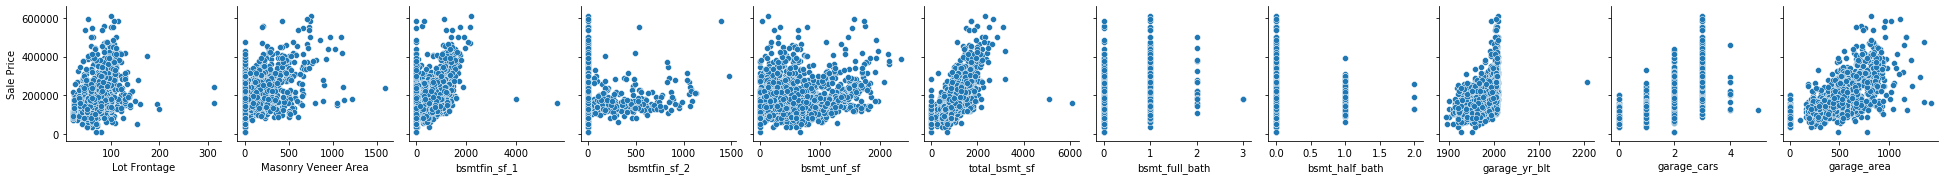

In [25]:
plot = sns.pairplot(train,y_vars='saleprice',x_vars=list(train.isnull().sum()[train.isnull().sum()>0].index))
plot.axes[0,0].set_ylabel('Sale Price')
plot.axes[0,0].set_xlabel('Lot Frontage')
plot.axes[0,1].set_xlabel('Masonry Veneer Area');

In [26]:
train[['lot_frontage', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath',
       'garage_yr_blt', 'garage_cars', 'garage_area','saleprice']].corr()[['saleprice']]

,saleprice
lot_frontage,0.341842
mas_vnr_area,0.512230
bsmtfin_sf_1,0.423519
bsmtfin_sf_2,0.016255
bsmt_unf_sf,0.190210
total_bsmt_sf,0.628925
bsmt_full_bath,0.283662
bsmt_half_bath,-0.045328
garage_yr_blt,0.533922
garage_cars,0.648220


Overall, there is a positive relationship between the year the house was built and the year the garage was built. Therefore, the effect of the year the garage was built can be proxied by the year the house was built, which does not have any missing values. Therefore, the `garage_yr_blt` variable will be dropped.

/Users/efesios659/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


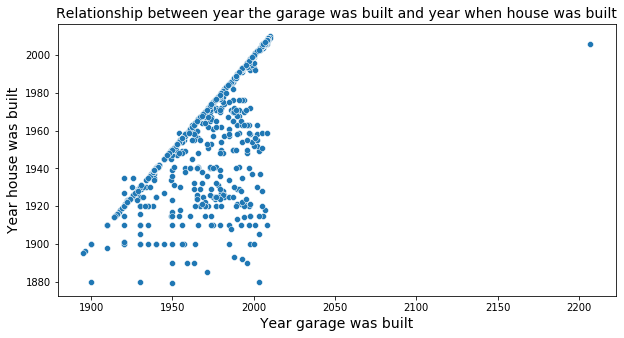

In [27]:
plt.figure(figsize=(10,5))
plt.title('Relationship between year the garage was built and year when house was built', size=14)
plt.xlabel('Year garage was built', size=14)
plt.ylabel('Year house was built',size=14)
sns.scatterplot(train['garage_yr_blt'],train['year_built']);

In [28]:
train[['garage_yr_blt','year_built']].corr()

,garage_yr_blt,year_built
garage_yr_blt,1.000000,0.825316
year_built,0.825316,1.000000


In [29]:
train.drop(columns=['lot_frontage','bsmtfin_sf_2','bsmt_unf_sf','garage_cars','garage_yr_blt'],inplace=True)
test.drop(columns=['lot_frontage','bsmtfin_sf_2','bsmt_unf_sf','garage_cars','garage_yr_blt'],inplace=True)

In [30]:
train.shape,test.shape

((2051, 54), (878, 53))

For the remaining numerical features, impute the missing data with the median of each column. Evaluate the impact of the imputation of these features' means and variances to assess the impact on the features' distributions.

In [31]:
med_imp = SimpleImputer(strategy='median')
missing_num_features = train.isnull().sum()[train.isnull().sum()>0].index
train_mean = train[missing_num_features]
train_mean = med_imp.fit_transform(train_mean)

train_mean = pd.DataFrame(train_mean, columns=train[missing_num_features].columns)

Mean of features without and with imputed data.

In [32]:
pd.DataFrame(zip(train[missing_num_features].mean(), train_mean.mean()),
             columns=['original mean', 'imputed mean'],
             index=[train.isnull().sum()[train.isnull().sum()>0].index])

,original mean,imputed mean
mas_vnr_area,99.695909,98.626524
bsmtfin_sf_1,442.300488,442.264261
total_bsmt_sf,1057.987805,1057.956850
bsmt_full_bath,0.427526,0.427109
bsmt_half_bath,0.063446,0.063384
garage_area,473.671707,473.674793


Variances of features without and with imputed data.

In [33]:
pd.DataFrame(zip(train[missing_num_features].var(), train_mean.var()),
             columns=['original variance', 'imputed variance'],
             index=[train.isnull().sum()[train.isnull().sum()>0].index])

,original variance,imputed variance
mas_vnr_area,30612.096339,30389.097521
bsmtfin_sf_1,212709.243972,212608.175010
total_bsmt_sf,201969.980818,201873.424113
bsmt_full_bath,0.273187,0.273099
bsmt_half_bath,0.063356,0.063298
garage_area,46627.734533,46605.008823


The imputation does not produce a substantial impact on the distribution of these features. Therefore, the imputation can be applied.

In [34]:
med_imp = SimpleImputer(strategy='median')
missing_num_features = train.isnull().sum()[train.isnull().sum()>0].index
train[missing_num_features] = med_imp.fit_transform(train[missing_num_features])
test[missing_num_features] = med_imp.transform(test[missing_num_features])

After the imputation was applied to the training and test sets, it is clear that there aren't any more missing values.

In [35]:
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

In [36]:
test.isnull().sum()[test.isnull().sum()>0]

Series([], dtype: int64)

For features that are object-type and remain in the data set, represent them as binary features for use in the model.

In [37]:
train['house_style'] = train['house_style'].apply(lambda x: 1 if x == '2Story' else 0)
test['house_style'] = test['house_style'].apply(lambda x: 1 if x == '2Story' else 0)

In [38]:
train['exterior_1st'] = train['exterior_1st'].apply(lambda x: 1 if x in ['VinylSd','MetalSd'] else 0)
test['exterior_1st'] = test['exterior_1st'].apply(lambda x: 1 if x in ['VinylSd','MetalSd'] else 0)

In [39]:
train['exterior_2nd'] = train['exterior_2nd'].apply(lambda x: 1 if x in ['VinylSd','MetalSd'] else 0)
test['exterior_2nd'] = test['exterior_2nd'].apply(lambda x: 1 if x in ['VinylSd','MetalSd'] else 0)

In [40]:
train['foundation'] = train['foundation'].apply(lambda x: 1 if x == 'PConc' else 0)
test['foundation'] = test['foundation'].apply(lambda x: 1 if x == 'PConc' else 0)

In [41]:
train['neighborhood'] = train['neighborhood'].apply(lambda x: 1 if x in ['NAmes','CollgCr','OldTown',
                                                                        'Edwards','Somerst','NridgHt'] else 0)
test['neighborhood'] = test['neighborhood'].apply(lambda x: 1 if x in ['NAmes','CollgCr','OldTown',
                                                                      'Edwards','Somerst','NridgHt'] else 0)

Complete encoding all remaining features.

In [42]:
train['ms_subclass'] = train['ms_subclass'].apply(lambda x: 1 if x in [20,60] else 0)

### Exploratory Data Analysis

To check for large outliers or leverage points in the data, all features are scaled to a common scale and analyzed for potential high_leverage points.

In [43]:
ss = StandardScaler()
scaled_features = pd.DataFrame(ss.fit_transform(train.drop(columns=['id','pid'])),
                               columns=train.drop(columns=['id','pid']).columns)

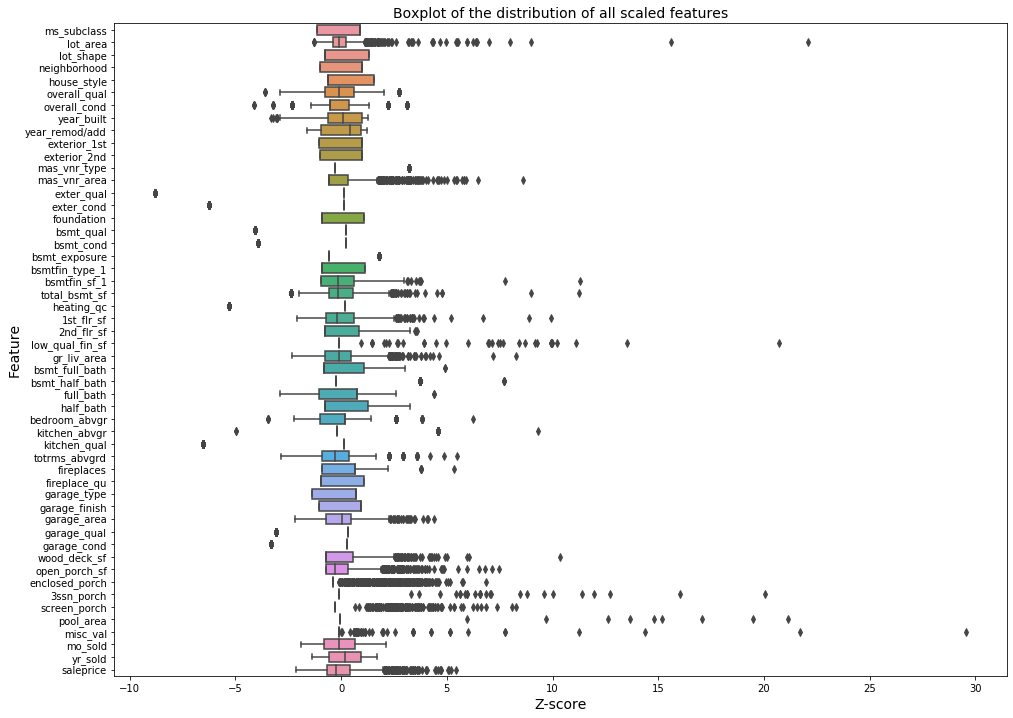

In [44]:
plt.figure(figsize=(16,12))
plt.title('Boxplot of the distribution of all scaled features', size=14)
plt.ylabel('Feature', size=14)
plt.xlabel('Z-score', size=14)
sns.boxplot(data=scaled_features, orient='h');

In [45]:
scaled_features[scaled_features['lot_area']> 15]

,ms_subclass,lot_area,lot_shape,neighborhood,house_style,overall_qual,overall_cond,year_built,year_remod/add,exterior_1st,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
471,-1.145552,22.094380,1.32123,-1.022187,-0.641531,-0.078644,1.302118,-0.454381,1.037027,-1.029192,...,-0.730121,0.755919,-0.377264,-0.102738,-0.287856,-0.06348,0.782246,-0.080134,-0.591387,1.205592
694,0.872942,15.589113,1.32123,-1.022187,-0.641531,0.622656,-0.509102,-0.023497,0.846833,-1.029192,...,2.226662,0.006642,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-0.080134,-0.591387,1.521092


The lot area for these two observations is sufficiently high that it may skew the distribution of the data set. Since these observations account for only a very small percentage of the dataset, they can be dropped. Drop the observations with extreme values in `lot_area` or at or above the 99.9th percentile.

In [46]:
np.percentile(scaled_features['lot_area'],99.9)

8.953193820097576

In [47]:
train = train[train['lot_area'] < np.percentile(train['lot_area'],99.9)]
test = test[test['lot_area'] < np.percentile(test['lot_area'],99.9)]

In [48]:
train.shape, test.shape

((2048, 54), (877, 53))

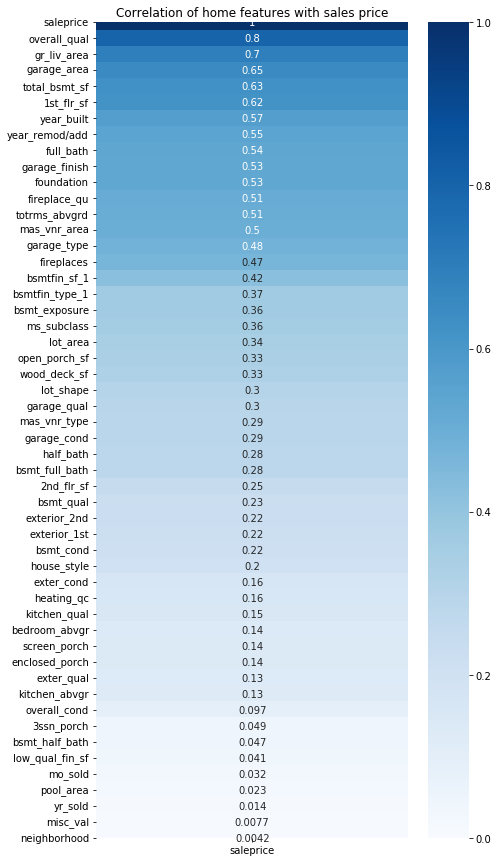

In [49]:
plt.figure(figsize=(7,15))
plt.ylabel('Feature',size=14)
plt.xlabel('Sales Price')
plt.title('Correlation of home features with sales price')
sns.heatmap(np.abs(train.drop(columns=['id','pid']).corr()[['saleprice']]).sort_values(by='saleprice',ascending=False)
            ,vmin=0,vmax=1, annot=True, cmap='Blues');

Based on this correlations heatmap, it appears that certain features has a strong association with the sales price, which include:
* Overall quality
* Above grade (ground) living area square feet
* Garage area
* Total square footage in the basement
* 1st floor square footage
* Year built and remodeled
* Number of full bathrooms
* Whether a garage is finished or roughly finished
* A measure of fireplace quality, where fireplaces are of at least average quality
* Total rooms above grade
* Type of foundation
* Masonry veneer area in square footage

### Explore the distribution of the independent variable, sales price.

/Users/efesios659/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/efesios659/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/efesios659/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


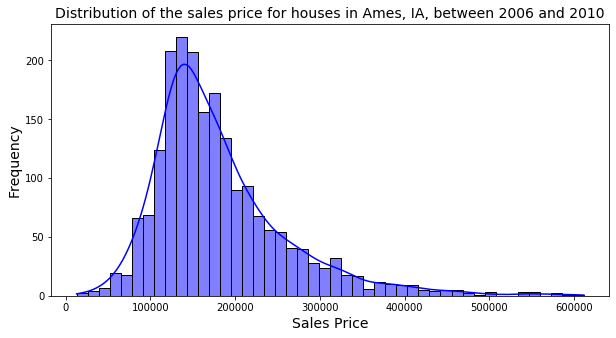

In [50]:
plt.figure(figsize=(10,5))
plt.xlabel('Sales Price', size=14)
plt.ylabel('Frequency', size=14)
plt.title('Distribution of the sales price for houses in Ames, IA, between 2006 and 2010', size=14)
sns.histplot(train['saleprice'],color='blue', kde=True);

To make sure that the assumptions of the linear regression model are not largely deviated from, smooth the distribution of the sales price by calculating the natural log of this feature.

In [51]:
train['saleprice'] = np.log(train['saleprice'])

/Users/efesios659/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/Users/efesios659/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/efesios659/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/efesios659/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


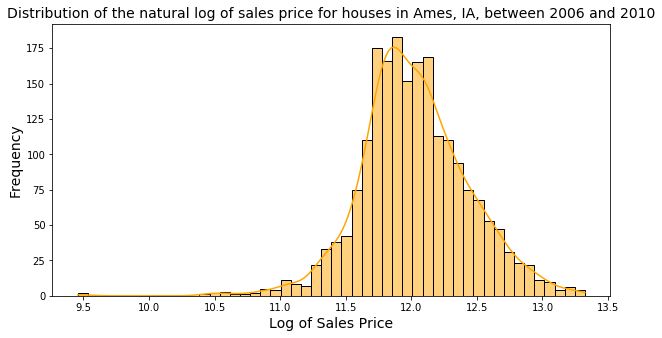

In [52]:
plt.figure(figsize=(10,5))
plt.xlabel('Log of Sales Price', size=14)
plt.ylabel('Frequency', size=14)
plt.title('Distribution of the natural log of sales price for houses in Ames, IA, between 2006 and 2010', size=14)
sns.histplot(train['saleprice'],color='orange', kde=True);

This feature is now closer to being normally distributed.

To continue exploring the relationship of all features to the target variable, use the `statsmodels api` to fit a multiple linear regression model of the features on the sales price. First, based on the correlations matrix previously identified and the features with an expected or strong relationship with sales price, select a group of features to run the multiple linear regression model.

In [53]:
corr = train.corr()[['saleprice']].sort_values(by='saleprice',ascending=False)

In [54]:
corr = corr[corr['saleprice']> 0.17]

Standarize the features prior to running the OLS regression. The following features were selected based on an iterative analysis of features that had a p-value of 0.05 or less when regressed against the sales price. These are features whose regression coefficients have a statistically significant effect on the sales price. The regression output below also shows that the R-squared value is 87% or that 87% of the variation in the sales price is explained by the model.

In [55]:
ss = StandardScaler()

In [56]:
features = ['ms_subclass','lot_area','lot_shape','overall_qual','overall_cond',
            'year_built','year_remod/add','exter_cond','foundation','bsmt_qual',
            'bsmt_exposure','bsmtfin_type_1','total_bsmt_sf','gr_liv_area',
            'bsmt_full_bath','full_bath','totrms_abvgrd','fireplaces',
            'fireplace_qu','garage_area','garage_cond','wood_deck_sf',
            'enclosed_porch','screen_porch']

In [57]:
X = pd.DataFrame(ss.fit_transform(train[features]),
                 columns=train[features].columns)

In [58]:
X = sm.add_constant(X)

In [59]:
y = pd.DataFrame(train['saleprice'])

In [60]:
y.reset_index(inplace=True)

In [61]:
y.drop(columns='index', inplace=True)

In [62]:
ols = sm.OLS(y, X).fit()

In [63]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     562.3
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        00:33:23   Log-Likelihood:                 1001.3
No. Observations:                2048   AIC:                            -1953.
Df Residuals:                    2023   BIC:                            -1812.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.0236      0.003   3644.202      0.000      12.017      12.030
ms_subclass        0.0236      0.004      5.488      0.000       0.015       0.032
lot_area           0.0178      0.004      4.196      0.000       0.009       0.026
lot_shape          0.0117      0.004      3.259      0.001       0.005       0.019
overall_qual       0.1263      0.006     21.652      0.000       0.115       0.138
overall_cond       0.0489      0.004     11.351      0.000       0.040       0.057
year_built         0.0583      0.007      7.994      0.000       0.044       0.073
year_remod/add     0.0195      0.005      3.729      0.000       0.009       0.030
exter_cond         0.0182      0.004      5.090      0.000       0.011       0.025
foundation         0.0229      0.005      4.552      0.000       0.013       0.033
bsmt_qual          0.0095      0.004      2.549      0.011       0.002       0.017
bsmt_exposure      0.0214      0.004      5.516      0.000       0.014       0.029
bsmtfin_type_1     0.0149      0.004      3.504      0.000       0.007       0.023
total_bsmt_sf      0.0342      0.005      7.243      0.000       0.025       0.043
gr_liv_area        0.0877      0.008     11.661      0.000       0.073       0.102
bsmt_full_bath     0.0280      0.004      6.882      0.000       0.020       0.036
full_bath          0.0191      0.005      3.841      0.000       0.009       0.029
totrms_abvgrd      0.0168      0.006      2.832      0.005       0.005       0.028
fireplaces         0.0111      0.006      1.727      0.084      -0.002       0.024
fireplace_qu       0.0246      0.006      3.896      0.000       0.012       0.037
garage_area        0.0257      0.005      5.133      0.000       0.016       0.035
garage_cond        0.0223      0.004      5.354      0.000       0.014       0.030
wood_deck_sf       0.0060      0.004      1.639      0.101      -0.001       0.013
enclosed_porch     0.0110      0.004      2.994      0.003       0.004       0.018
screen_porch       0.0223      0.003      6.473      0.000       0.016       0.029
==============================================================================
Omnibus:                     1749.398   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           155073.256
Skew:                          -3.513   Prob(JB):                         0.00
Kurtosis:                      45.047   Cond. No.                         7.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the regression output below, the model explains approximately 87% of the variability in the natural log of the sales price based on the features selected. Some features have statistically significant coefficients as measured by the p-value of or lower than 0.05. For instance, the natural log of `lot area` has a statistically significant effect on the natural log of the sale price at any confidence level because the p-value is 0.

As the lot area increases by one square footage unit, the sale price increases by around 2% holding all other variables constant [source](https://sites.google.com/site/curtiskephart/ta/econ113/interpreting-beta). This demonstrates that as expected, `Lot Area` is a relevant variable in explaining sale prices.

In [64]:
lr = LinearRegression()

In [65]:
lr.fit(X, y)

LinearRegression()

In [66]:
coeffs = pd.DataFrame(zip(X.columns,lr.coef_.reshape(-1,1)), columns=['Feature', 'Reg Coefficient'])

In [67]:
coeffs['Reg Coefficient'] = coeffs['Reg Coefficient'].astype(float)

In [68]:
coeffs = coeffs.sort_values(by='Reg Coefficient', ascending=False)

In [69]:
coeffs = coeffs.drop(index=0)

In [70]:
feature_names = list(coeffs['Feature'].values)

In [71]:
coeffs.loc[coeffs['Feature']=='overall_qual', 'Feature'] = 'Overall quality'
coeffs.loc[coeffs['Feature']=='gr_liv_area', 'Feature'] = 'Above grade (ground) living area square feet'
coeffs.loc[coeffs['Feature']=='year_built', 'Feature'] = 'Year Built'
coeffs.loc[coeffs['Feature']=='overall_cond', 'Feature'] = 'Overall condition'
coeffs.loc[coeffs['Feature']=='total_bsmt_sf', 'Feature'] = 'Total basement square footage'
coeffs.loc[coeffs['Feature']=='bsmt_full_bath', 'Feature'] = 'Full bathrooms in basement'
coeffs.loc[coeffs['Feature']=='garage_area', 'Feature'] = 'Garage area'
coeffs.loc[coeffs['Feature']=='fireplace_qu', 'Feature'] = 'Fireplace quality'
coeffs.loc[coeffs['Feature']=='ms_subclass', 'Feature'] = '1-2 Story - 1945 & Newer'
coeffs.loc[coeffs['Feature']=='foundation', 'Feature'] = 'Poured concrete foundation'
coeffs.loc[coeffs['Feature']=='garage_cond', 'Feature'] = 'Garage condition'
coeffs.loc[coeffs['Feature']=='screen_porch', 'Feature'] = 'Screen porch area in square feet'
coeffs.loc[coeffs['Feature']=='bsmt_exposure', 'Feature'] = 'Good or average basement exposure'
coeffs.loc[coeffs['Feature']=='year_remod/add', 'Feature'] = 'Year remodeled'
coeffs.loc[coeffs['Feature']=='full_bath', 'Feature'] = 'Number of full bathrooms'
coeffs.loc[coeffs['Feature']=='exter_cond', 'Feature'] = 'Exterior condition'
coeffs.loc[coeffs['Feature']=='lot_area', 'Feature'] = 'Lot area'
coeffs.loc[coeffs['Feature']=='totrms_abvgrd', 'Feature'] = 'Total rooms above grade level'
coeffs.loc[coeffs['Feature']=='bsmtfin_type_1', 'Feature'] = 'Rating of basement finished area'
coeffs.loc[coeffs['Feature']=='lot_shape', 'Feature'] = 'Lot shape'
coeffs.loc[coeffs['Feature']=='fireplaces', 'Feature'] = 'Number of fireplaces'
coeffs.loc[coeffs['Feature']=='enclosed_porch', 'Feature'] = 'Enclosed porch area in square feet'
coeffs.loc[coeffs['Feature']=='bsmt_qual', 'Feature'] = 'Height of the basement'
coeffs.loc[coeffs['Feature']=='wood_deck_sf', 'Feature'] = 'Wood deck area in square feet'

The following plot presents the regression coefficients of the features in the model and the log of the sales price. Features such as the `overall quality` rating have a higher effect on the log of the sales price compared to other features such as the `lot area`.

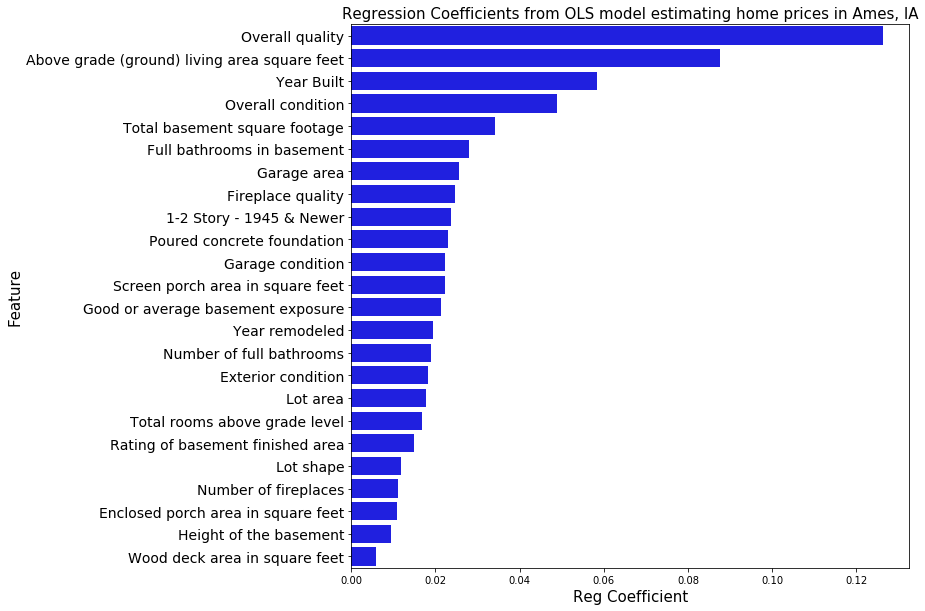

In [72]:
plt.figure(figsize=(10,10))
plt.title('Regression Coefficients from OLS model estimating home prices in Ames, IA', size=15)
plt.ylabel('Feature', size=15)
plt.yticks(size=14)
plt.xlabel('Regression Coefficient at 5% significance level', size=15)
sns.barplot(x='Reg Coefficient', y='Feature', data=coeffs, orient='h', color='blue');

Some of the features highlighted as having a statistically significant effect on the sales price are common to Zillow features displayed on their profiles. These features include:
* Number of bathrooms
* Year built
* Year of renovation
* Basement exposure to walkout or garden walls
* Overall condition of the house
* Number of fire places

However, Zillow offers less or limited information on detailed qualitative evaluations of specific areas of the property. These include:
* The rating (7-10) on overall material and finish of the house (`overall quality`)
* Assessment of the fireplace quality (excellent, good, average, poor, fair)
* Assessment of exterior condition
* Assessment of basement quality based on the height of the basement

If these qualitative data could be obtained and published while protecting home owners' privacy, they might provide a differentiating factor compared to competitors such as Zillow and RedFin. This information may be particularly valuable to real estate developers who may want to search in bulk for properties in poor condition that could be flipped or improved for a profit.

From these previous correlation and linear regression analyses, it is evident that some home features have a statistically significant effect on the sale price. The expectation for the machine learning model will be that the following features will predict the sales prices. The performance of those predictions will be evaluated by comparing the model's predictions with the predictions of a 'null' model or the model that would predict all unknown sales prices to be the average of the sales price from the training data set. In other words, a model without any additional information other than the sales price itself. Additional performance metrics used will be the `root mean squared error` and the coefficient of determination or `r-squared`. The root mean squared error will be measured on a similar scale as the predicted values and will provide an intuitive metric to evaluate performance.

***Independent variables***:
* `overall_qual`
* `gr_liv_area`
* `year_built`
* `overall_cond`
* `total_bsmt_sf`
* `bsmt_full_bath`
* `garage_area`
* `fireplace_qu`
* `ms_subclass`
* `foundation`
* `garage_cond`
* `screen_porch`
* `bsmt_exposure`
* `year_remod/add`
* `full_bath`
* `exter_cond`
* `lot_area`
* `totrms_abvgrd`
* `bsmtfin_type_1`
* `lot_shape`
* `fireplaces`
* `enclosed_porch`
* `bsmt_qual`
* `wood_deck_sf`

***Target variable***:
* `saleprice`

These features were selected based on having the highest correlation with the `saleprice` and the features with statistically significant coefficients from the linear regression model.

# Preprocessing and Modeling:

Check for multicollinearity, scale the data and split into the training and validation sets.

Two pairs of features appear to have a high-correlation with each other. However, they are not perfect linear combinations of another. Therefore, they will be kept in the data set.

* `totrms_abvgrd` and `gr_liv_area`
* `fireplace_qu` and `fireplaces`

In [73]:
train[feature_names].corr().head()

,overall_qual,gr_liv_area,year_built,overall_cond,total_bsmt_sf,bsmt_full_bath,garage_area,fireplace_qu,ms_subclass,foundation,...,full_bath,exter_cond,lot_area,totrms_abvgrd,bsmtfin_type_1,lot_shape,fireplaces,enclosed_porch,bsmt_qual,wood_deck_sf
overall_qual,1.000000,0.566929,0.603067,-0.082472,0.548444,0.175364,0.563554,0.455003,0.246363,0.572062,...,0.514963,0.196961,0.127715,0.382841,0.323963,0.256303,0.389128,-0.154384,0.303395,0.256561
gr_liv_area,0.566929,1.000000,0.259273,-0.110560,0.453190,0.064535,0.491225,0.483914,0.180066,0.331587,...,0.617151,0.065644,0.397072,0.814205,0.117449,0.203196,0.458411,-0.007412,0.109213,0.270510
year_built,0.603067,0.259273,1.000000,-0.370899,0.410766,0.215537,0.486997,0.238520,0.477611,0.666820,...,0.480542,0.207621,0.052268,0.137970,0.417387,0.282860,0.169862,-0.380210,0.261175,0.216497
overall_cond,-0.082472,-0.110560,-0.370899,1.000000,-0.158850,-0.039094,-0.137372,-0.053524,-0.113381,-0.282853,...,-0.219510,0.177784,-0.034918,-0.094355,-0.017965,-0.059877,-0.006797,0.108442,0.036709,0.012281
total_bsmt_sf,0.548444,0.453190,0.410766,-0.158850,1.000000,0.321427,0.488526,0.309694,0.317301,0.319262,...,0.324794,0.099235,0.326426,0.294794,0.291026,0.192082,0.331093,-0.087517,0.368465,0.223674


### Standardized the data and calculate second degree polynomials.

In [74]:
ss = StandardScaler()
poly = PolynomialFeatures(include_bias = False, degree=2)

In [75]:
X = train[feature_names]
y = train['saleprice']
test_ids = test['id']
test = test[feature_names]

In [76]:
X.shape, test.shape

((2048, 24), (877, 24))

In [77]:
X = poly.fit_transform(X)
test_with_polynomials = poly.transform(test)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [79]:
ss = StandardScaler()

In [80]:
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

Before running the ordinary least squares, Ridge, and Lasso regression models, set up the null model for evaluation.

In [81]:
y_train_null = [np.mean(y_train)] * len(y_train)
y_test_null = [np.mean(y_train)] * len(y_test)

# Model Evaluation:

#### Calculate the root mean squared error on the training and testing set for the null model

In [82]:
metrics.mean_squared_error(y_train, y_train_null, squared=False)

0.4201527772638589

In [83]:
metrics.mean_squared_error(y_test, y_test_null, squared=False)

0.38230419225149664

#### Calculate the R-squared for the training and testing set for the null model

In [84]:
metrics.r2_score(y_train, y_train_null)

0.0

In [85]:
metrics.r2_score(y_test, y_test_null)

-0.0020354410003038392

The average of the sale price from the training data set does not have any explanatory power in the training and testing data sets as the R-squared value is 0 and less than 0, respectively. The root mean square error in both is very close. Therefore, the null model has not added any value in the ability to predict unknown house prices.

#### Ordinary Least Squares regression

In [86]:
lr = LinearRegression()

In [87]:
lr.fit(Xs_train, y_train)

LinearRegression()

In [88]:
y_pred = lr.predict(Xs_test)

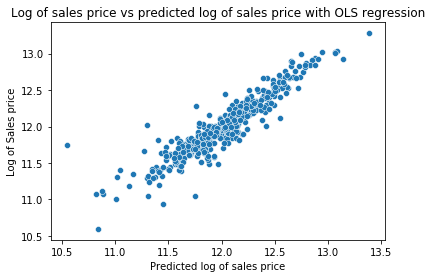

In [89]:
plt.title('Log of sales price vs predicted log of sales price with OLS regression')
plt.xlabel('Predicted log of sales price')
plt.ylabel('Log of Sales price')
sns.scatterplot(x=y_pred,y=y_test);

In [90]:
metrics.mean_squared_error(y_train, lr.predict(Xs_train), squared=False)

0.09903902433611943

In [91]:
metrics.mean_squared_error(y_test, lr.predict(Xs_test), squared=False)

0.14422969069718783

In [92]:
lr.score(Xs_train, y_train)

0.9444353952518871

In [93]:
lr.score(Xs_test, y_test)

0.8573820118089213

The root mean squared error results are significantly lower in both the training and testing data sets in the OLS model in comparison to the null model. The R-squared also indicates that around 94% fof the variation in the log of sales price is explained by the model in the training set and around 86% in the testing set. The model is less effective at predicting the log of sales price at values below 11.5 or more than 13.

#### Ridge regression

Ridge regression along with Lasso regularization are regression techniques that correct for the impact of additional variables on the predictions from a model. Through a regularization hyperparameter,alpha, these techniques seek to minimize the impact of these coefficients to avoid overfitting. Inherently, as the impact of additional regression coefficients included to a model is diminished through these techniques, the model will diminish the importance of features that may not be useful in predicting the target variable. In ridge and lasso regression, we seek to minimize a loss function that is the mean squared error plus the sum of the squared coefficients times the penalty parameter. In Lasso regression, the penalty term is defined as the sum of the absolute value of the regression coefficients. A small value of alpha will have the effect of reducing the impact of the regression coefficients faster in comparison to ridge regression due to the smaller magnitude of the sum of the absolute values of the regression coefficients in comparison to the squared values in ridge regression.

#### The code below does the following:
* Identifies an evenly spaced number of alphas based on the log scale between 0 and 5 for 100 values.
* Instantiates the ridge regression model, using as the scoring metric the R-squared and a cross validation of 5 folds.
* The model is fit using the scaled data and the best alpha is reported next.
* The root mean squared error and the R-squared are calculated on the training and testing data set to evaluate the model's performance.

In [94]:
alpha = np.logspace(0,5,100)

ridge_cv = RidgeCV(alphas=alpha, scoring='r2', cv=5)
ridge_cv.fit(Xs_train, y_train)

ridge_cv.alpha_

83.02175681319744

In [95]:
ridge_cv.score(Xs_train,y_train)

0.9193704860429829

In [96]:
ridge_cv.score(Xs_test,y_test)

0.8967712828520145

In [97]:
metrics.mean_squared_error(y_train, ridge_cv.predict(Xs_train), squared=False)

0.11930379526011177

In [98]:
metrics.mean_squared_error(y_test, ridge_cv.predict(Xs_test), squared=False)

0.12270656091892854

#### Lasso regression


In [99]:
lasso_alphas = np.logspace(-3,0,100)
lasso_cv = LassoCV(alphas=lasso_alphas, cv=5, max_iter=50000)
lasso_cv.fit(Xs_train,y_train)

lasso_cv.alpha_

0.002009233002565048

In [100]:
lasso_cv.score(Xs_train,y_train)

0.9070161650708827

In [101]:
lasso_cv.score(Xs_test,y_test)

0.8979922546268722

In [102]:
metrics.mean_squared_error(y_train, lasso_cv.predict(Xs_train), squared=False)

0.12811824045452774

In [103]:
metrics.mean_squared_error(y_test, lasso_cv.predict(Xs_test), squared=False)

0.1219787261352133

### <center> R-squared values by data set and regression model

| R-squared	| Null 	| OLS 	| Ridge 	| Lasso 	|
|---	|---	|---	|---	|---	|
| Train 	| 0 	| 0.944 	| 0.919 	| 0.907 	|
| Test 	| -0.002 	| 0.857 	| 0.897 	| 0.898 	|

### <center> Mean-squared error values by data set and regression model

| MSE | Null 	| OLS 	| Ridge 	| Lasso 	|
|---	|---	|---	|---	|---	|
| Train 	| 0.42 	| 0.099 	| 0.119 	| 0.128 	|
| Test 	| 0.382 	| 0.144 	| 0.122 	| 0.121 	|

Overall, the lasso model with an alpha of `0.002` produced the highest performance with an R-squared of 89.8% in the testing data set and 90.7% in the training data set and comparibly similar root mean squared errors in both the testing and training data sets. The Lasso regression model is the best among all possible choices because it increased the R-squared and reduced the root mean squared error in the testing set the most. This means that this model has the most explanatory among all three considered, although there difference is not very large between the Lasso and Ridge regression models.

#### Produce Kaggle predictions.

In [104]:
test_transformed = ss.transform(test_with_polynomials)
y_pred = np.exp(lr.predict(test_transformed))

In [105]:
id_val = pd.DataFrame(test_ids)
id_val

preds = pd.DataFrame(y_pred)
preds

kaggle_submission = id_val.join(preds)

kaggle_submission.rename(columns={0: 'saleprice'}, inplace=True)

## Generate a directory to output data.
if not os.path.exists('./datasets/'):
    os.mkdir('./datasets/')

kaggle_submission.to_csv('./datasets/sub_reg.csv', index=False)

# Conclusions and Recommendations:

Through a multiple linear regression model, a machine learning algorithm was used to predict home prices using data from the city of Ames, Iowa. Over 80 features about the homes sold between 2006 and 2010 were considered as potential predictors of home sale prices. A competitor to Zillow and RedFin requested data analytics services to understand if any of those features predicted home sale prices and if any of those features are not currently being displayed by Zillow and other large competitors in the real estate online search industry. In addition, this company also set out to understand if it could predict home prices accurately in the event that additional data of home features became available in regions where competitors don't have a large presence in terms of the number of houses with actual or predicted prices.

This analysis concluded the following features had statistically significant effect on home prices at the 0.05 significance level:
* Year Built
* Living area in square feet
* Qualitative ratings on overall material and condition of the house
* Qualitative ratings on fireplace and heating quality and condition
* Size of the garage in square feet
* Year when the house was last remodeled
* Number of bathrooms in the basement
* Number of fireplaces
* Fireplace quality
* Number of bathrooms
* Number of bedrooms

Zillow already displays some of these features on its online profiles. However, it does not have subject matter expert's feedback on home quality and conditions. For instance, Zillow only provides an indicator of the condition of the house but does not provide detailed information about assessor's ratings on material and finish for a house. Additional qualitative information such as whether a house has good or excellent fireplace quality and heating quality and condition as well as the materials involved in the construction of the house, such as in its foundation, could be distinguishing pieces of information that the client could provide to home searchers or investors who would like to know more detail about their prospective homes. A potential niche market of clients for these data are real estate investors interested in finding properties in less than optimal condition to transform them into profitable properties.

A machine learning algorithm based on a lasso regression model that explained around 90% of the variance in the natural log of the sales prices of unknown homes. On average, the actual and predicted price followed one another, although at both the low and high ends of the distribution of sales price, the model performed less optimally. More research is needed to further refine this model and increase its performance on unseen data. As a next step the client will continue refining its predictive model with the goal of explaining 95%-99% of the variation in the sale price.